<a href="https://colab.research.google.com/github/mossytreesandferns/NASAExoplanetOOL/blob/master/Meteorites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/NASAData/")
os.getcwd()

'/content/gdrive/My Drive/NASAData'

# Meteorite Data
Link to data api found here: https://data.nasa.gov/Earth-Science/Meteorite-Landings-API/c2vx-j9ed

### Cleaning up the data

In [0]:
import pandas as pd
import numpy as np
import json

# Alternate code:
# with open('Meteorites.json') as file:
#    data = json.load(file)
# print(data)


In [45]:
df = pd.read_json('Meteorites.json') #, lines=False, orient='records'
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'latitude': '54.21667', 'longitude': '-113.0'}",NaN,NaN


In [46]:
# Alternate code:
# df = df[['name','id','nametype',	'recclass','mass','fall',	'year', 'reclat',	'reclong']]
# df.head(3)


# Looking at columnw
df = df.iloc[:,0:9]
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000


In [47]:
# Checking for null values
df.isnull().sum()

name         0
id           0
nametype     0
recclass     0
mass        28
fall         0
year         1
reclat      12
reclong     12
dtype: int64

In [48]:
df.describe()

,id,mass,reclat,reclong
count,1000.00000,9.720000e+02,988.000000,988.000000
mean,15398.72800,5.019020e+04,29.691592,19.151208
std,10368.70402,7.539857e+05,23.204399,68.644015
min,1.00000,1.500000e-01,-44.116670,-157.866670
25%,7770.50000,6.795000e+02,21.300000,-5.195832
50%,12757.50000,2.870000e+03,35.916665,17.325000
75%,18831.25000,1.005000e+04,45.817835,76.004167
max,57168.00000,2.300000e+07,66.348330,174.400000


In [0]:
# Filling null values in the 'mass' column with the mean
df.mass.fillna(df.mass.mean(), inplace=True)

In [50]:
df.isnull().sum()

name         0
id           0
nametype     0
recclass     0
mass         0
fall         0
year         1
reclat      12
reclong     12
dtype: int64

In [51]:
# String methods into datetime conversion
df['year'] = df.year.str.strip('T00:00:00.000')
df['year'] = df.year.str.replace('-','/')
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880/01/01,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951/01/01,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952/01/01,54.21667,-113.00000


In [0]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')

In [53]:
df.fall.value_counts()

Fell     996
Found      4
Name: fall, dtype: int64

In [54]:
df.dtypes

name                object
id                   int64
nametype            object
recclass            object
mass               float64
fall                object
year        datetime64[ns]
reclat             float64
reclong            float64
dtype: object

### Exploratory graphical data analysis
Plotting size of meteorites over time

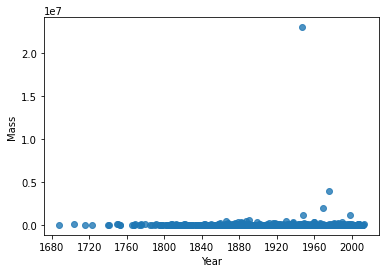

In [55]:
# Plotting size of meteorites over time
import matplotlib.pyplot as plt

plt.scatter(df.year, df.mass, alpha=.8)
plt.xlabel('Year')
plt.ylabel('Mass') # Units unknown.  kg?
plt.show()

Most metorites are small. <br>
<br>
Is there a relationship between latitude or longitude and mass?

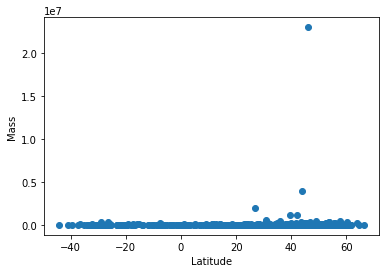

In [56]:
# Is there a relationship between latitude or longitude and mass?
plt.scatter(df.reclat, df.mass)
plt.xlabel('Latitude') # Latitude
plt.ylabel('Mass') 
plt.show()

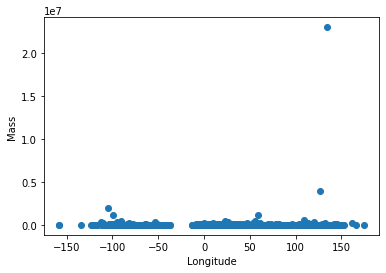

In [57]:
# Longitude
plt.scatter(df.reclong, df.mass)
plt.xlabel('Longitude') 
plt.ylabel('Mass') 
plt.show()

It's probably not possible to collect meteorites that fall in the Atlantic Ocean.<br>

In [0]:
# Remember ecdf()
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

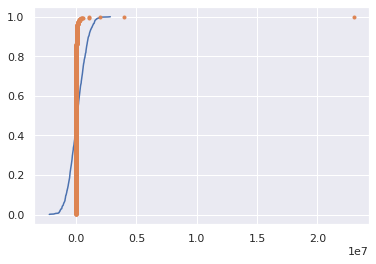

In [62]:
# Plotting the ECDF
met_mean = np.mean(df.mass)
met_sd = np.std(df.mass)
theoretical_met_size = np.random.normal(met_mean, met_sd, size=1000)

x_theor, y_theor = ecdf(theoretical_met_size)
x, y = ecdf(df.mass)
# Plotting EDCF of meteorite size
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

The actual cdf varies from the theoretical cdf.  What happens when we take out the the biggest outlier?

In [63]:
df.mass.max()

23000000.0

In [0]:
df = df[df.mass < 23000000.0]

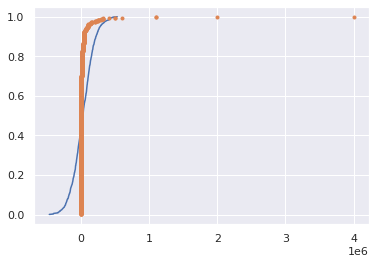

In [65]:
# Plotting ECDF again
met_mean = np.mean(df.mass)
met_sd = np.std(df.mass)
theoretical_met_size = np.random.normal(met_mean, met_sd, size=1000)

x_theor, y_theor = ecdf(theoretical_met_size)
x, y = ecdf(df.mass)
# Plotting EDCF of meteorite size
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

Still quite a bit of variation.
<br>
Looking at the distribution of meteorite mass.

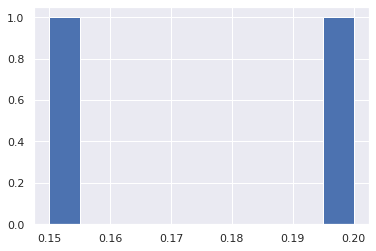

In [68]:
# Plotting the distribution of meteorite size
df = df[df.mass < 1]
import seaborn as sns
sns.set()
plt.hist(df.mass)
plt.show()

Most meteorites are around .15 kg or .2 kg.